In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [55]:
df = pd.read_csv("final_home_price_data.csv")

In [56]:
df.drop(columns=["observation_date","Year","Month"], inplace=True)

In [57]:
y = df.pop("CSUSHPISA")
X = df

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# ML Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 30.23695717855645
R-squared: 0.9884698334417799
Coefficients:
per_cap_gpd: -3.9580423490010013
Cons_material_index: 32.94436857983167
Consumer_price_index: 9.10839783300672
emp_rate: -2.004113737045238
unemp_rate: -1.4910642718518632
fed_eff_r: 6.710541226933674
new_pvt_units: 9.312538400507314
workin_pop: 7.401357155742159
housing_subs: 4.332263705589895
total_housholds: -20.34967407245706
med_house_inocome: 14.751843194864644
Intercept: 188.11223958333332

Model: ElasticNet
Mean Squared Error: 124.76994581713092
R-squared: 0.9524218575223611
Coefficients:
per_cap_gpd: 6.458747237788417
Cons_material_index: 10.610323595555187
Consumer_price_index: 6.2248157698502276
emp_rate: 3.2344534193409182
unemp_rate: -0.5479495301966888
fed_eff_r: 4.907529537299387
new_pvt_units: 6.283103879009306
workin_pop: 0.0
housing_subs: 7.692738878499786
total_housholds: 1.7233330752338978
med_house_inocome: 5.714104333186376
Intercept: 188.11223958333335

Mode

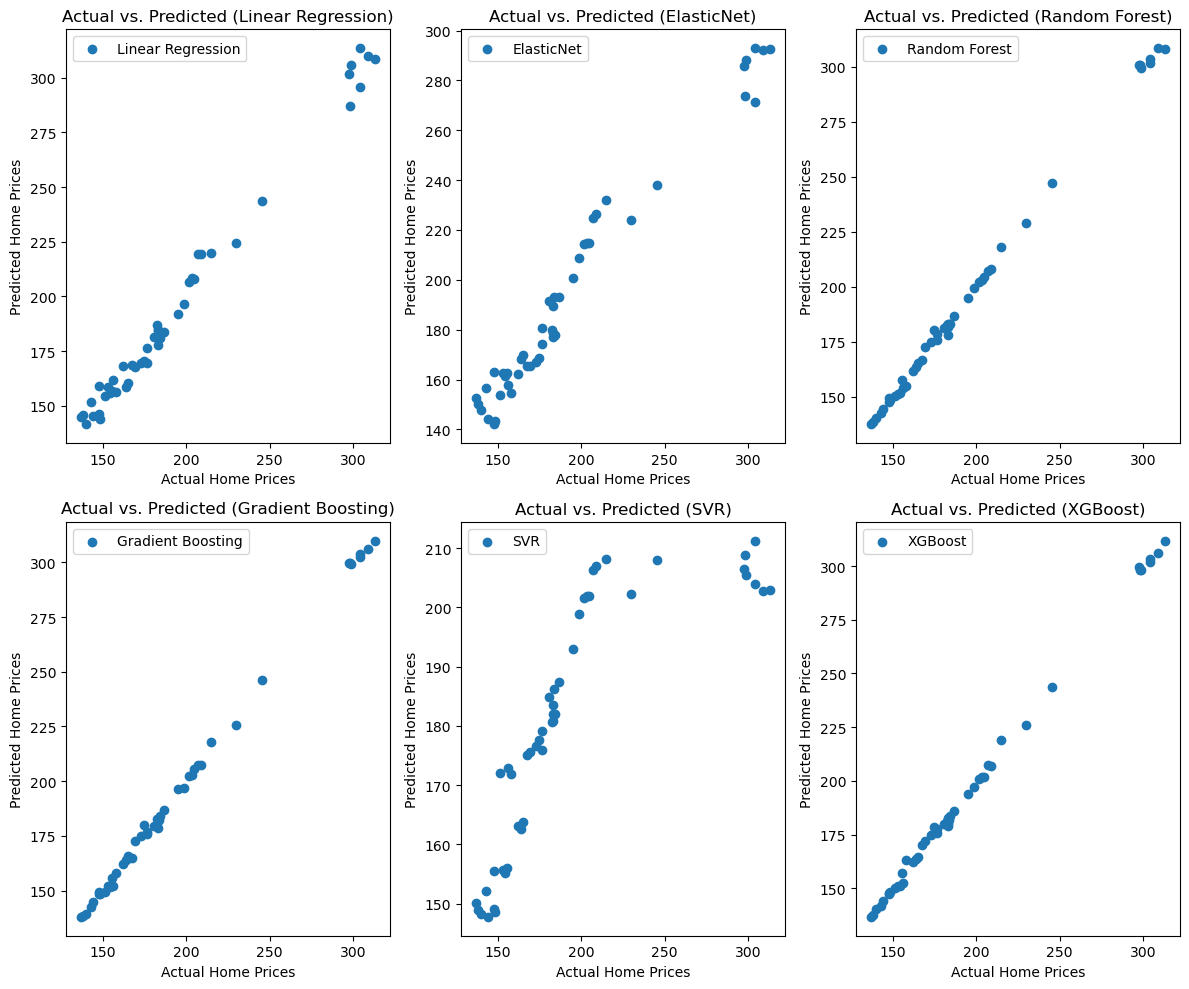


Best Model: GradientBoostingRegressor with MSE: 3.6204829308858906


In [61]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")